# **Task:**
---

1. Implement various sorting algorithms (bubble, insert, quick, merge).
2. Compare the algorithms by counting the number of comparisons.
3. Compare the comparison count with wall clock time.

# **Libraries:**
---

In [90]:
import time
from tabulate import tabulate
import math
import matplotlib.pyplot as plt

# **Sorting Algorithms:**
---

## **Bubble Sort:**

In [40]:
def cmp(x, y):
    return x <= y

def bubblepass(a):
    swap_count = 0
    comp_count = 0
    k = len(a)
    for i in range(k - 1):
        comp_count += 1
        if not cmp(a[i], a[i+1]):
            a[i], a[i+1] = a[i+1], a[i]
            swap_count += 1
    return swap_count, comp_count, a

def bubble_sort(a):
    total_comp = 0
    
    swaps, comp, a = bubblepass(a)
    total_comp += comp
    
    while swaps > 0:
        swaps, comp, a = bubblepass(a)
        total_comp += comp
    
    return a, total_comp

In [71]:
a1 = [64, 34, 25, 12, 22, 11, 90, 17]
sorted_list, total_comparisons = bubble_sort(a1.copy())
print("Sorted List:", sorted_list)
print("Total Comparisons:", total_comparisons)

Sorted List: [11, 12, 17, 22, 25, 34, 64, 90]
Total Comparisons: 42


## **Insert Sort:**

In [42]:
def cmp(x, y):
    return x <= y

def insert(a1, b):
    comp = 0
    a1_ext = a1[:]
    a1_ext.append(b)
    j = len(a1) - 1
    while j >= 0:
        comp += 1
        if not cmp(a1_ext[j], a1_ext[j+1]):
            a1_ext[j], a1_ext[j+1] = a1_ext[j+1], a1_ext[j]
            j -= 1
        else:
            break
    return a1_ext, comp

def insert_sort(a):
    total_comp = 0
    n = len(a)
    for i in range(1, n):
        a1 = a[:i]
        a2 = a[i:]
        a1, comp = insert(a1, a2[0])
        total_comp += comp
        a = a1 + a2[1:]
    return a, total_comp

In [77]:
a1 = [64, 34, 25, 12, 22, 11, 90, 17]
sorted_list, total_comparisons = insert_sort(a1.copy())
print("Sorted List:", sorted_list)
print("Total Comparisons:", total_comparisons)

Sorted List: [11, 12, 17, 22, 25, 34, 64, 90]
Total Comparisons: 22


## **Quicksort:**
---

In [73]:
def cmp(x, y):
    return x <= y

def partition(a, p):
    comp = 0
    n = len(a)
    lam = []
    rho = []
    pivot = a[p]
    for i in range(n):
        if i == p:
            continue
        comp += 1
        if cmp(a[i], pivot):
            lam.append(a[i])
        else:
            rho.append(a[i])
    return lam, rho, comp

def quick_sort(a):
    if len(a) <= 1:
        return a, 0
    pivot = a[0]
    lam, rho, comp_part = partition(a, 0)
    sorted_lam, comp_lam = quick_sort(lam)
    sorted_rho, comp_rho = quick_sort(rho)
    total_comp = comp_part + comp_lam + comp_rho
    return sorted_lam + [pivot] + sorted_rho, total_comp

In [78]:
a1 = [64, 34, 25, 12, 22, 11, 90, 17]
sorted_list, total_comparisons = quick_sort(a1.copy())
print("Sorted List:", sorted_list)
print("Total Comparisons:", total_comparisons)

Sorted List: [11, 12, 17, 22, 25, 34, 64, 90]
Total Comparisons: 20


## **Merge Sort:**

In [75]:
def cmp(x, y):
    return x <= y

def merge(a, b):
    i = 0
    j = 0
    p = len(a)
    q = len(b)
    c = []
    comp = 0
    while i < p and j < q:
        comp += 1
        if cmp(a[i], b[j]):
            c.append(a[i])
            i += 1
        else:
            c.append(b[j])
            j += 1
    while i < p:
        c.append(a[i])
        i += 1
    while j < q:
        c.append(b[j])
        j += 1
    return c, comp

def merge_sort(a):
    n = len(a)
    if n <= 1:
        return a, 0
    k2 = n // 2
    a1 = a[:k2]
    a2 = a[k2:]
    sorted_a1, comp_a1 = merge_sort(a1)
    sorted_a2, comp_a2 = merge_sort(a2)
    merged, comp_merge = merge(sorted_a1, sorted_a2)
    total_comp = comp_a1 + comp_a2 + comp_merge
    return merged, total_comp

In [79]:
a1 = [64, 34, 25, 12, 22, 11, 90, 17]
sorted_list, total_comparisons = merge_sort(a1.copy())
print("Sorted List:", sorted_list)
print("Total Comparisons:", total_comparisons)

Sorted List: [11, 12, 17, 22, 25, 34, 64, 90]
Total Comparisons: 16


**Remarks:**

As we can see, I applied all 4 algorithms on same list: `a1 = [64, 34, 25, 12, 22, 11, 90, 17]`


The number of comparisons we observed are in this increasing order:

`merge_sort() {=16} < quick_sort() {=20} < insert_sort() {=22} < bubble_sort() {=42}`

# **Ananlysis of Sorting Algorithms:**
---

As we can see below, The first set of functions is designed to generate a collection of worst-case input arrays for the sorting algorithms. The `generate_reverse_sorted_arrays` function creates an array of arrays, where each individual array is reverse sorted—this represents the worst-case scenario for many sorting methods. Each array’s size starts at 10 and increases by a fixed gap (e.g., if the gap is 20, the sizes will be 10, 30, 50, etc.), ensuring that we test the algorithms on a variety of input sizes. For instance, the worst-case comparison count for bubble sort is given by $n(n-1),$ while for insertion sort it is $\frac{n(n-1)}{2}.$

The second component, encapsulated in the `measure_algorithms` function, runs each sorting algorithm (bubble sort, insertion sort, quicksort, and merge sort) on each of these reverse sorted arrays. It records the number of comparisons made and measures the wall clock time (using Python’s high-resolution timer) for each algorithm on every array. This systematic measurement allows us to directly compare the practical performance with theoretical expectations—such as quicksort’s best-case $ (n-1) \log_2{n} $ or worst-case $ (n-1)^2 $ comparisons, and merge sort’s consistent $ n \log_2{n} $ behavior.

Finally, the `plot_results` function visualizes these results in multiple graphs. For each algorithm, it plots the measured number of comparisons versus the array size, overlaying theoretical curves (dotted lines) like $n(n-1)$ for bubble sort, $\frac{n(n-1)}{2}$ for insertion sort, both $ (n-1) \log_2{n} $ and $ (n-1)^2 $ for quicksort, and $n \log_{2}{n}$ for merge sort. In addition, two consolidated plots display all algorithms together—one comparing their comparison counts and another showing the corresponding time elapsed. This visual analysis helps the reader understand both the scaling behavior and the efficiency trade-offs among the different sorting algorithms under worst-case conditions.


In [80]:
def generate_reverse_sorted_arrays(n, gap):
    arrays = []
    for i in range(n):
        size = 10 + i * gap
        arr = list(range(size, 0, -1))
        arrays.append(arr)
    return arrays

In [81]:
test_arrays = generate_reverse_sorted_arrays(50, 20)
print(test_arrays)

[[10, 9, 8, 7, 6, 5, 4, 3, 2, 1], [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], [50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], [70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], [90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], [110, 109, 108, 107, 106, 105, 104

In [82]:
def measure_algorithms(arrays):
    bubble_results = []
    insert_results = []
    quick_results = []
    merge_results = []
    for arr in arrays:
        size = len(arr)
        start = time.perf_counter()
        _, comp_bubble = bubble_sort(arr.copy())
        elapsed_bubble = time.perf_counter() - start

        start = time.perf_counter()
        _, comp_insert = insert_sort(arr.copy())
        elapsed_insert = time.perf_counter() - start

        start = time.perf_counter()
        _, comp_quick = quick_sort(arr.copy())
        elapsed_quick = time.perf_counter() - start

        start = time.perf_counter()
        _, comp_merge = merge_sort(arr.copy())
        elapsed_merge = time.perf_counter() - start

        bubble_results.append((size, comp_bubble, elapsed_bubble))
        insert_results.append((size, comp_insert, elapsed_insert))
        quick_results.append((size, comp_quick, elapsed_quick))
        merge_results.append((size, comp_merge, elapsed_merge))
    return bubble_results, insert_results, quick_results, merge_results

In [93]:
bubble_results, insert_results, quick_results, merge_results = measure_algorithms(test_arrays)

rows = []
for i in range(len(bubble_results)):
    size = bubble_results[i][0]
    bubble_comp = bubble_results[i][1]
    bubble_time = bubble_results[i][2]
    insert_comp = insert_results[i][1]
    insert_time = insert_results[i][2]
    quick_comp = quick_results[i][1]
    quick_time = quick_results[i][2]
    merge_comp = merge_results[i][1]
    merge_time = merge_results[i][2]
    
    rows.append([
        size,
        bubble_comp, f"{bubble_time:.7f}",
        insert_comp, f"{insert_time:.7f}",
        quick_comp, f"{quick_time:.7f}",
        merge_comp, f"{merge_time:.7f}"
    ])

headers = [
    "Size", 
    "Bubble Counts", "Bubble Time",
    "Insert Counts", "Insert Time",
    "Quick Counts", "Quick Time",
    "Merge Counts", "Merge Time"
]

print(tabulate(rows, headers=headers, tablefmt="fancy_grid"))

╒════════╤═════════════════╤═══════════════╤═════════════════╤═══════════════╤════════════════╤══════════════╤════════════════╤══════════════╕
│   Size │   Bubble Counts │   Bubble Time │   Insert Counts │   Insert Time │   Quick Counts │   Quick Time │   Merge Counts │   Merge Time │
╞════════╪═════════════════╪═══════════════╪═════════════════╪═══════════════╪════════════════╪══════════════╪════════════════╪══════════════╡
│     10 │              90 │     5.82e-05  │              45 │     5.39e-05  │             45 │    4.76e-05  │             19 │    3.91e-05  │
├────────┼─────────────────┼───────────────┼─────────────────┼───────────────┼────────────────┼──────────────┼────────────────┼──────────────┤
│     30 │             870 │     0.0005127 │             435 │     0.0004882 │            435 │    0.0002382 │             77 │    0.0001028 │
├────────┼─────────────────┼───────────────┼─────────────────┼───────────────┼────────────────┼──────────────┼────────────────┼──────────────┤

In [85]:
def plot_results(bubble_results, insert_results, quick_results, merge_results):
    sizes_bubble = [x[0] for x in bubble_results]
    comps_bubble = [x[1] for x in bubble_results]
    times_bubble = [x[2] for x in bubble_results]

    sizes_insert = [x[0] for x in insert_results]
    comps_insert = [x[1] for x in insert_results]
    times_insert = [x[2] for x in insert_results]

    sizes_quick = [x[0] for x in quick_results]
    comps_quick = [x[1] for x in quick_results]
    times_quick = [x[2] for x in quick_results]

    sizes_merge = [x[0] for x in merge_results]
    comps_merge = [x[1] for x in merge_results]
    times_merge = [x[2] for x in merge_results]

    def bubble_theory(k): return k * (k - 1)
    def insert_theory(k): return k * (k - 1) / 2
    def quick_theory_best(k): return (k - 1) * math.log2(k) if k > 0 else 0
    def quick_theory_worst(k): return (k - 1) ** 2
    def merge_theory(k): return k * math.log2(k) if k > 0 else 0

    fig, ax1 = plt.subplots()
    ax1.plot(sizes_bubble, comps_bubble, 'bo-', label='Measured Comparisons')
    ax1.plot(sizes_bubble, [bubble_theory(k) for k in sizes_bubble], 'b--', label='Theoretical (k*(k-1))')
    ax1.set_xlabel('Array Size')
    ax1.set_ylabel('Comparisons', color='b')
    ax2 = ax1.twinx()
    ax2.plot(sizes_bubble, times_bubble, 'ro-', label='Time Elapsed')
    ax2.set_ylabel('Time (sec)', color='r')
    plt.title('Bubble Sort Performance')
    fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))
    plt.show()

    fig, ax1 = plt.subplots()
    ax1.plot(sizes_insert, comps_insert, 'bo-', label='Measured Comparisons')
    ax1.plot(sizes_insert, [insert_theory(k) for k in sizes_insert], 'b--', label='Theoretical (k*(k-1)/2)')
    ax1.set_xlabel('Array Size')
    ax1.set_ylabel('Comparisons', color='b')
    ax2 = ax1.twinx()
    ax2.plot(sizes_insert, times_insert, 'ro-', label='Time Elapsed')
    ax2.set_ylabel('Time (sec)', color='r')
    plt.title('Insertion Sort Performance')
    fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))
    plt.show()

    fig, ax1 = plt.subplots()
    ax1.plot(sizes_quick, comps_quick, 'bo-', label='Measured Comparisons')
    ax1.plot(sizes_quick, [quick_theory_best(k) for k in sizes_quick], 'b--', label='Theoretical Best ((k-1)*log2(k))')
    ax1.plot(sizes_quick, [quick_theory_worst(k) for k in sizes_quick], 'b:', label='Theoretical Worst ((k-1)^2)')
    ax1.set_xlabel('Array Size')
    ax1.set_ylabel('Comparisons', color='b')
    ax2 = ax1.twinx()
    ax2.plot(sizes_quick, times_quick, 'ro-', label='Time Elapsed')
    ax2.set_ylabel('Time (sec)', color='r')
    plt.title('Quick Sort Performance')
    fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))
    plt.show()

    fig, ax1 = plt.subplots()
    ax1.plot(sizes_merge, comps_merge, 'bo-', label='Measured Comparisons')
    ax1.plot(sizes_merge, [merge_theory(k) for k in sizes_merge], 'b--', label='Theoretical (k*log2(k))')
    ax1.set_xlabel('Array Size')
    ax1.set_ylabel('Comparisons', color='b')
    ax2 = ax1.twinx()
    ax2.plot(sizes_merge, times_merge, 'ro-', label='Time Elapsed')
    ax2.set_ylabel('Time (sec)', color='r')
    plt.title('Merge Sort Performance')
    fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))
    plt.show()

    plt.figure()
    plt.plot(sizes_bubble, comps_bubble, 'bo-', label='Bubble')
    plt.plot(sizes_insert, comps_insert, 'go-', label='Insertion')
    plt.plot(sizes_quick, comps_quick, 'ro-', label='Quick')
    plt.plot(sizes_merge, comps_merge, 'co-', label='Merge')
    plt.xlabel('Array Size')
    plt.ylabel('Comparisons')
    plt.title('Comparison Counts for All Algorithms')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(sizes_bubble, times_bubble, 'bo-', label='Bubble')
    plt.plot(sizes_insert, times_insert, 'go-', label='Insertion')
    plt.plot(sizes_quick, times_quick, 'ro-', label='Quick')
    plt.plot(sizes_merge, times_merge, 'co-', label='Merge')
    plt.xlabel('Array Size')
    plt.ylabel('Time (sec)')
    plt.title('Time Elapsed for All Algorithms')
    plt.legend()
    plt.show()

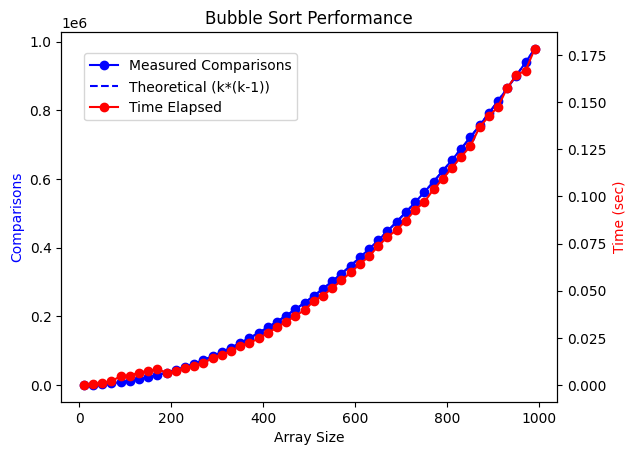

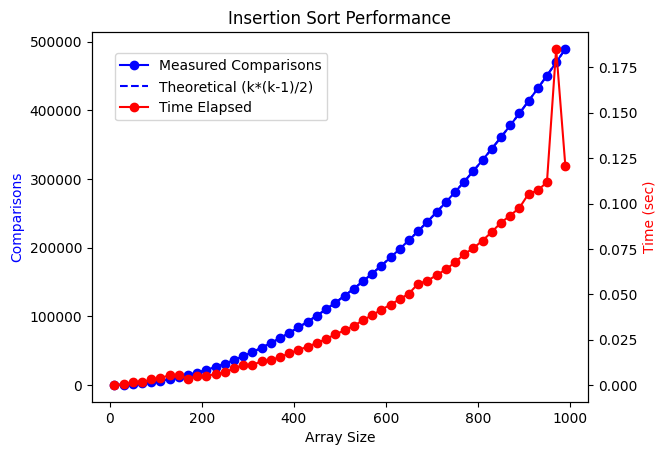

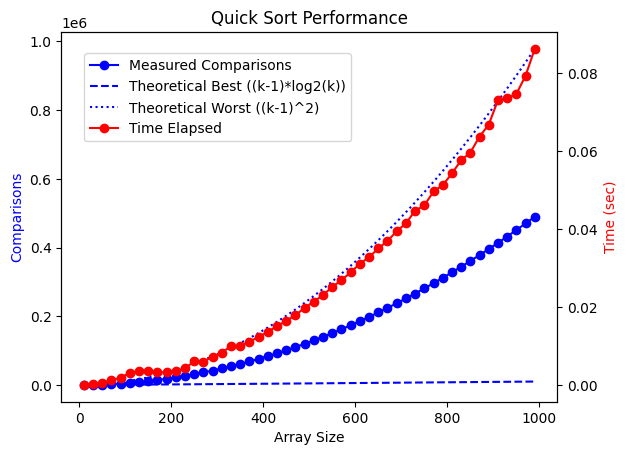

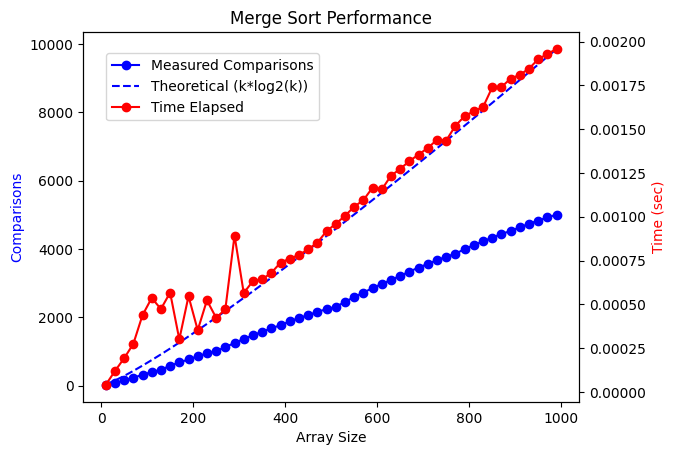

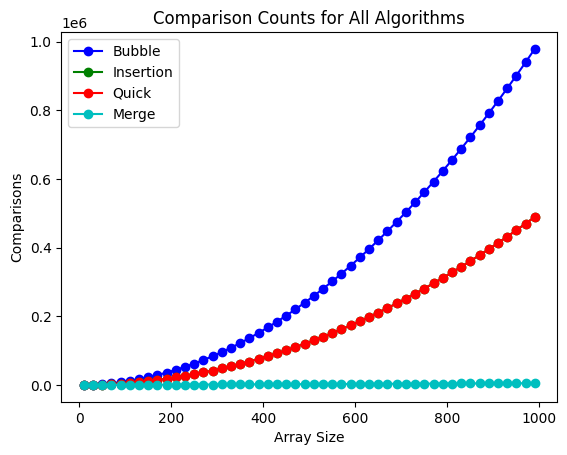

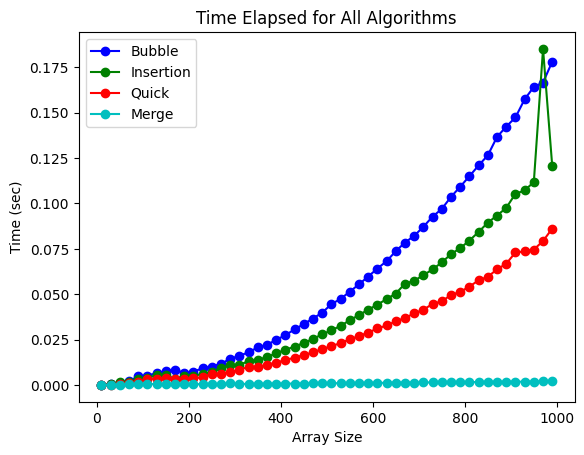

In [88]:
plot_results(bubble_results, insert_results, quick_results, merge_results)